# Exploratory Data Analysis
We have two datasets cleaned and organised after data preparation process.
* **Dataset 1**: 20 subjects with sleep staging, heart rate, skin temperature and actigraphy
* **Dataset 2**: 59 subjects with sleep staging, heart rate, skin temperature

The purpose of EDA is to:
* Descriptive statistics of all variables (mean, stdev, min, max, percentile)
* Check if missing data
* Group the data per patient, check if any outlier or extreme
* Check sleep-wake distribution

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

%matplotlib inline
matplotlib.style.use('ggplot')
pd.set_option('display.max_rows', 20)
matplotlib.rcParams['figure.figsize'] = (10, 6)

# Dateset 1 - 20 subjects with Actigraphy data 

In [2]:
subjects_df = pd.read_csv("./Input/ins_subjects_161014.csv", index_col=0, parse_dates=True)
subjects_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 19369 entries, 2015-09-09 20:47:01 to 2015-10-01 07:01:16
Data columns (total 21 columns):
Abdomen        19346 non-null float64
Activity       19365 non-null float64
Calf           18541 non-null float64
Chest          19361 non-null float64
Fingertip      19348 non-null float64
Foot           19336 non-null float64
Forearm        19356 non-null float64
Forehead       19361 non-null float64
HR_mean        17791 non-null float64
HR_stdev       17773 non-null float64
Hand           18303 non-null float64
Patient_id     19369 non-null object
ST_DPG         19352 non-null float64
ST_Distal      19352 non-null float64
ST_Proximal    19361 non-null float64
Scapula        19354 non-null float64
Staging        19369 non-null object
Toe            17933 non-null float64
Upperarm       19361 non-null float64
Upperleg       19342 non-null float64
White Light    19365 non-null float64
dtypes: float64(19), object(2)
memory usage: 3.3+ MB


In [3]:
subjects_df.describe()

,Abdomen,Activity,Calf,Chest,Fingertip,Foot,Forearm,Forehead,HR_mean,HR_stdev,Hand,ST_DPG,ST_Distal,ST_Proximal,Scapula,Toe,Upperarm,Upperleg,White Light
count,19346.000000,19365.000000,18541.000000,19361.000000,19348.000000,19336.000000,19356.000000,19361.000000,17791.000000,17773.000000,18303.000000,19352.000000,19352.000000,19361.000000,19354.000000,17933.000000,19361.000000,19342.000000,19365.000000
mean,35.470085,7.233101,34.453941,34.535624,34.749848,34.316328,33.296366,33.935964,1.038663,0.078271,33.940714,0.239783,34.190611,34.429314,34.966675,33.597433,33.621219,34.094241,0.831035
std,0.818592,31.400052,1.203691,1.001198,1.430844,1.223804,1.757286,0.919302,0.168261,0.072515,1.208351,0.963059,1.205088,0.961945,0.977778,1.709799,1.648723,1.371549,1.518924
min,32.386000,0.000000,29.880000,32.094000,25.141000,27.359000,28.465500,31.040000,0.547000,0.000707,28.968750,-2.097875,25.544167,31.375938,32.439000,23.244000,27.149750,28.946000,0.005000
25%,34.981000,0.000000,33.710750,33.778000,34.068750,33.949750,32.180188,33.436000,0.929016,0.034395,33.228000,-0.286687,33.664026,33.704875,34.186000,32.889000,32.724500,33.070500,0.120000
50%,35.667000,0.000000,34.630000,34.462500,34.943500,34.572000,33.428000,33.996500,1.055393,0.056097,33.961000,0.107437,34.398875,34.571000,35.053000,33.981000,33.797500,34.318500,0.325000
75%,36.067000,0.000000,35.417250,35.293500,35.784500,35.055500,34.823000,34.470000,1.149385,0.093115,34.741000,0.545063,34.984016,35.147500,35.838000,34.753500,34.748000,35.158750,0.940000
max,36.976000,734.000000,36.437000,36.708000,37.016500,36.242000,36.422000,36.339000,2.353000,0.833792,37.297000,8.187958,36.560667,36.425500,36.674000,36.766000,36.641000,36.985000,69.790000


### Sleep and wake distribution of each patient 

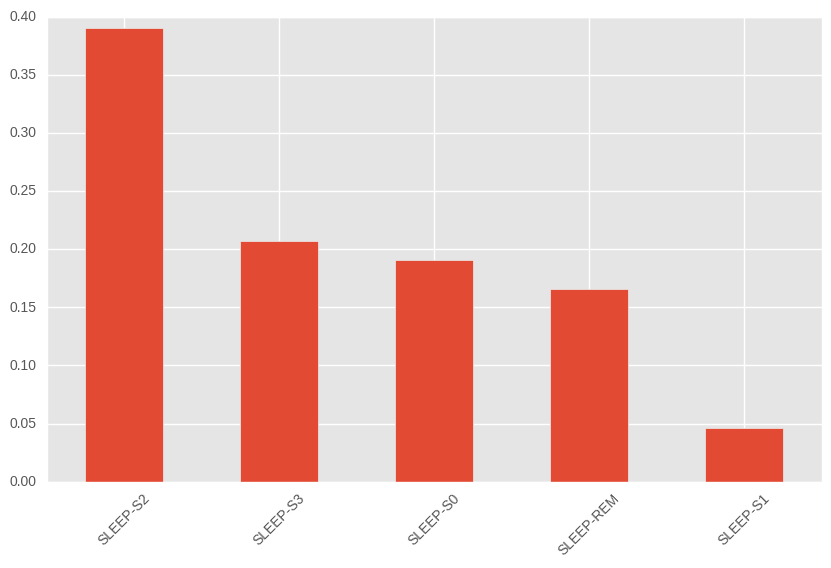

In [7]:
subjects_df['Staging'].value_counts(normalize=True).plot(kind='bar', rot=45)

In [8]:
Staging = subjects_df['Staging'].apply(lambda s: 0 if 'S0' in s else 1)

In [9]:
Staging.value_counts(normalize=True)

1    0.809696
0    0.190304
Name: Staging, dtype: float64

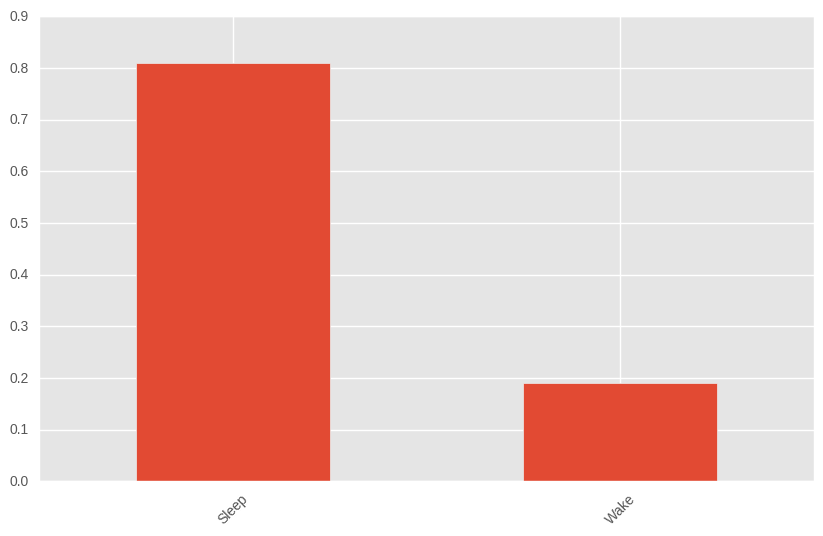

In [10]:
Staging.value_counts(normalize=True).plot(kind='bar', rot=45)
plt.xticks([0, 1], ['Sleep', 'Wake']); plt.show()

### Check the mean of HR for each subject

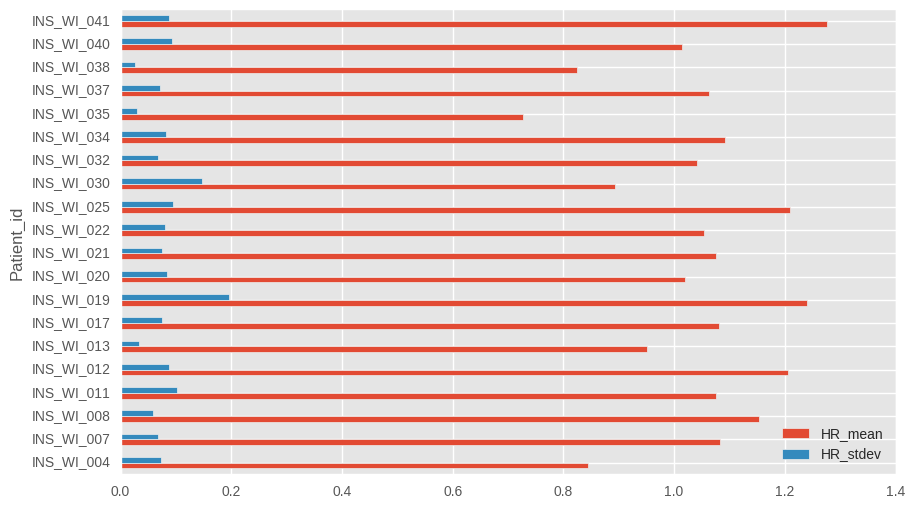

In [11]:
subjects_df.groupby('Patient_id')[['HR_mean', 'HR_stdev']].mean().plot(kind='barh',y=['HR_mean', 'HR_stdev'])

### Check the mean for ST_DPG

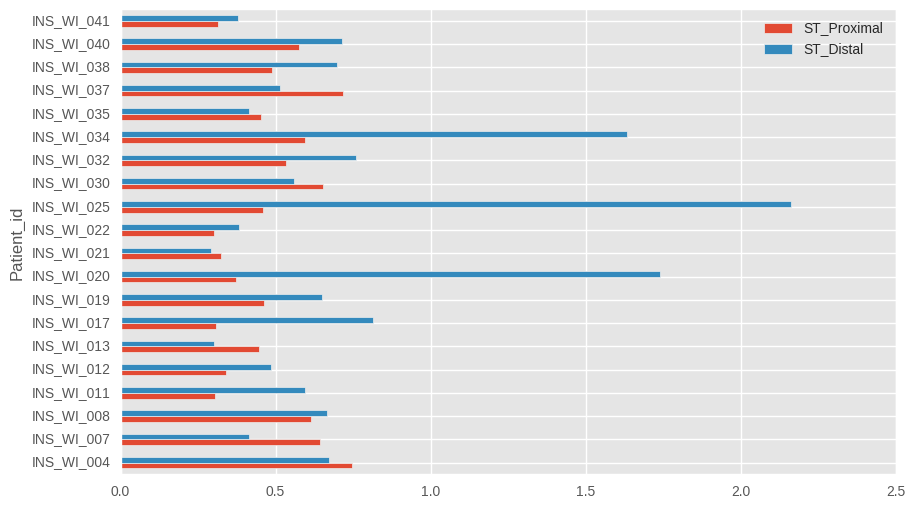

In [12]:
subjects_df.groupby('Patient_id')[['ST_Proximal', 'ST_Distal', 'ST_DPG']].std()\
        .plot(y=['ST_Proximal', 'ST_Distal'], kind='barh')

### Check the mean for activity and white light 

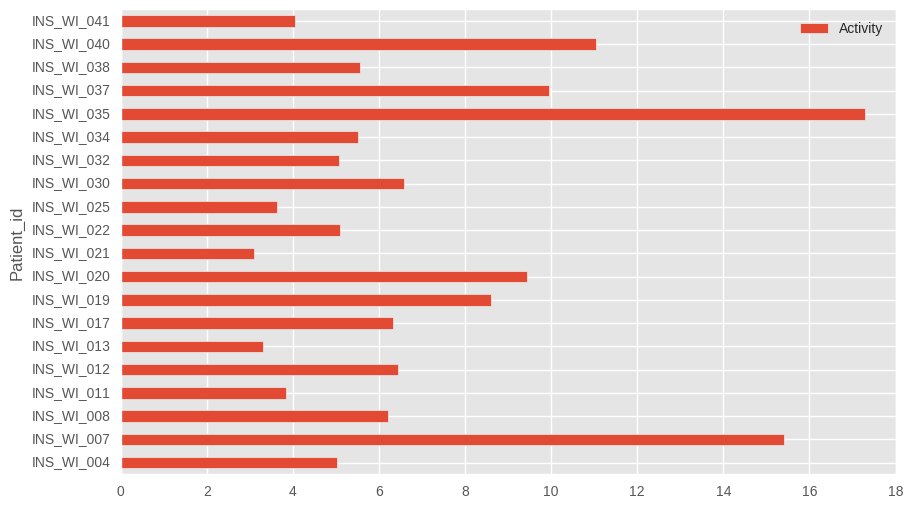

In [13]:
subjects_df.groupby('Patient_id')[['Activity', 'White Light']].mean().plot(y=['Activity'], kind='barh')

## Skin temperature

In [14]:
one_subject = subjects_df[subjects_df['Patient_id']=='INS_WI_038']
one_subject['Staging'] = one_subject['Staging'].apply(lambda s: 0 if 'S0' in s else 1)
# INS_030

/home/qfen8290/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


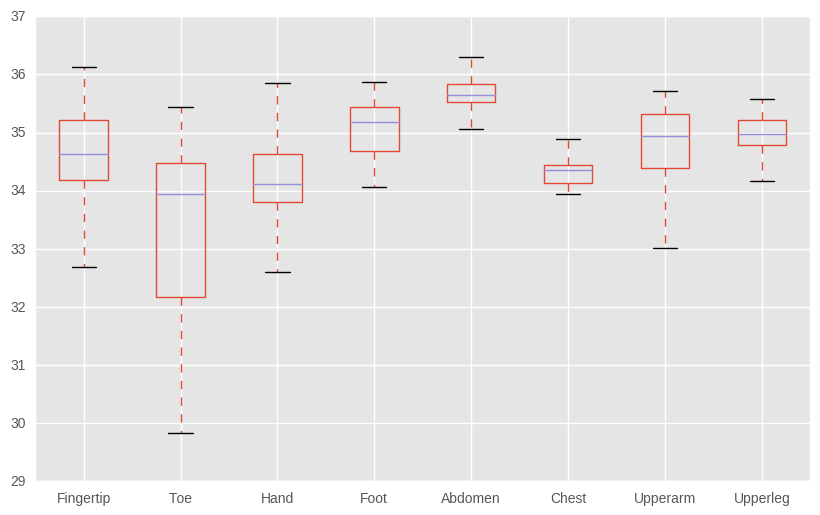

In [15]:
one_subject[['Fingertip', 'Toe', 'Hand', 'Foot','Abdomen', 'Chest', 'Upperarm', 'Upperleg']].\
             plot(kind='box')#, vert=True)
# plt.figure(); ins_wi_034.plot()

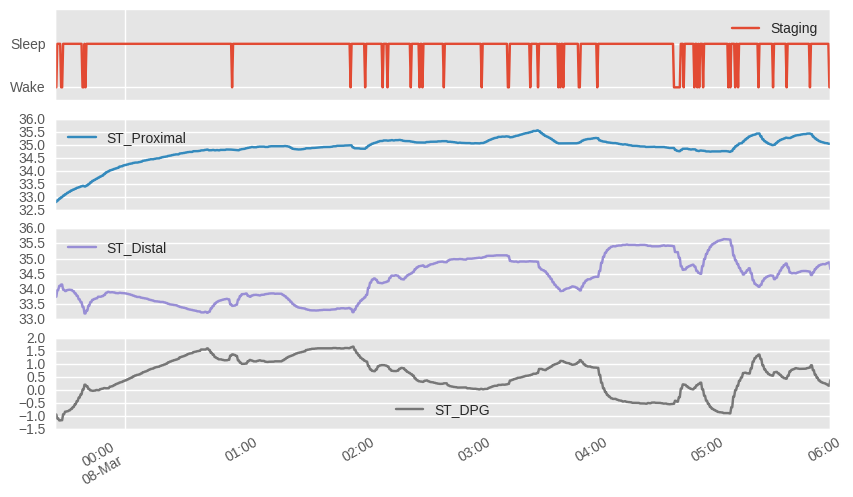

In [16]:
axes = one_subject.plot(y=['Staging', 'ST_Proximal', 'ST_Distal', 'ST_DPG'], subplots=True)
plt.sca(axes[0])
plt.ylim(-0.3, 1.8)
plt.yticks([0, 1], ['Wake', 'Sleep'])
plt.show()

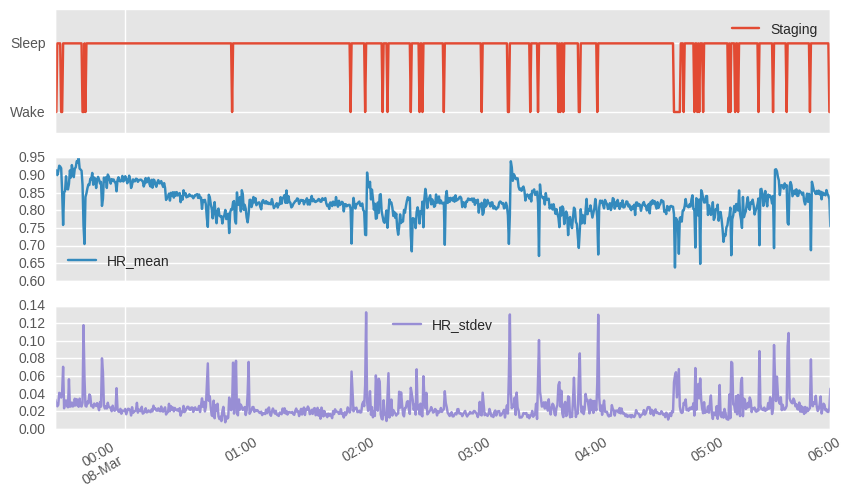

In [17]:
ax1 = one_subject.plot(y=['Staging', 'HR_mean', 'HR_stdev'], subplots=True)
# plt.ylim(-0.1, 1.3)
# ax2 = ax1.twinx()
# plt.ylim(-0.1, 1.5)
# plt.yticks([0, 1], ['Wake', 'Sleep'])
# plt.margins(0.2)
# plt.subplots_adjust(right=0.95)
plt.sca(ax1[0])
plt.ylim(-0.3, 1.5)
plt.yticks([0, 1], ['Wake', 'Sleep'])

plt.show()


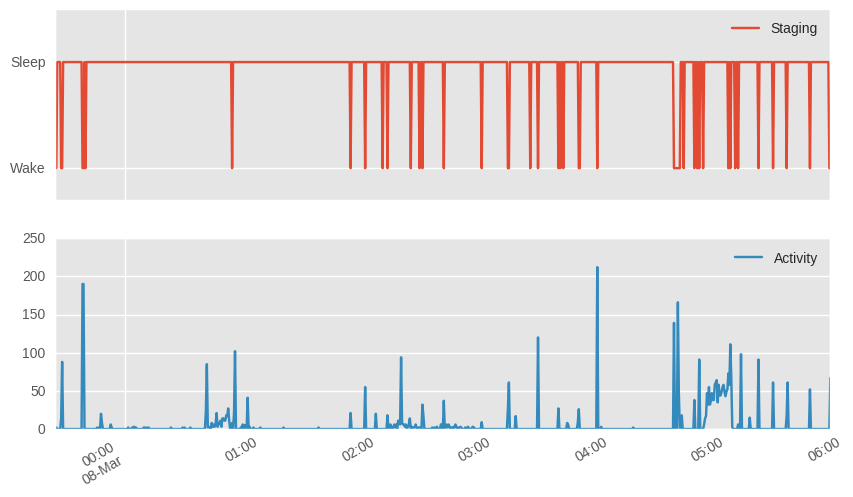

In [18]:
axes = one_subject.plot(y=['Staging', 'Activity'], subplots=True)
plt.sca(axes[0])
plt.ylim(-0.3, 1.5)
plt.yticks([0, 1], ['Wake', 'Sleep'])
plt.show()

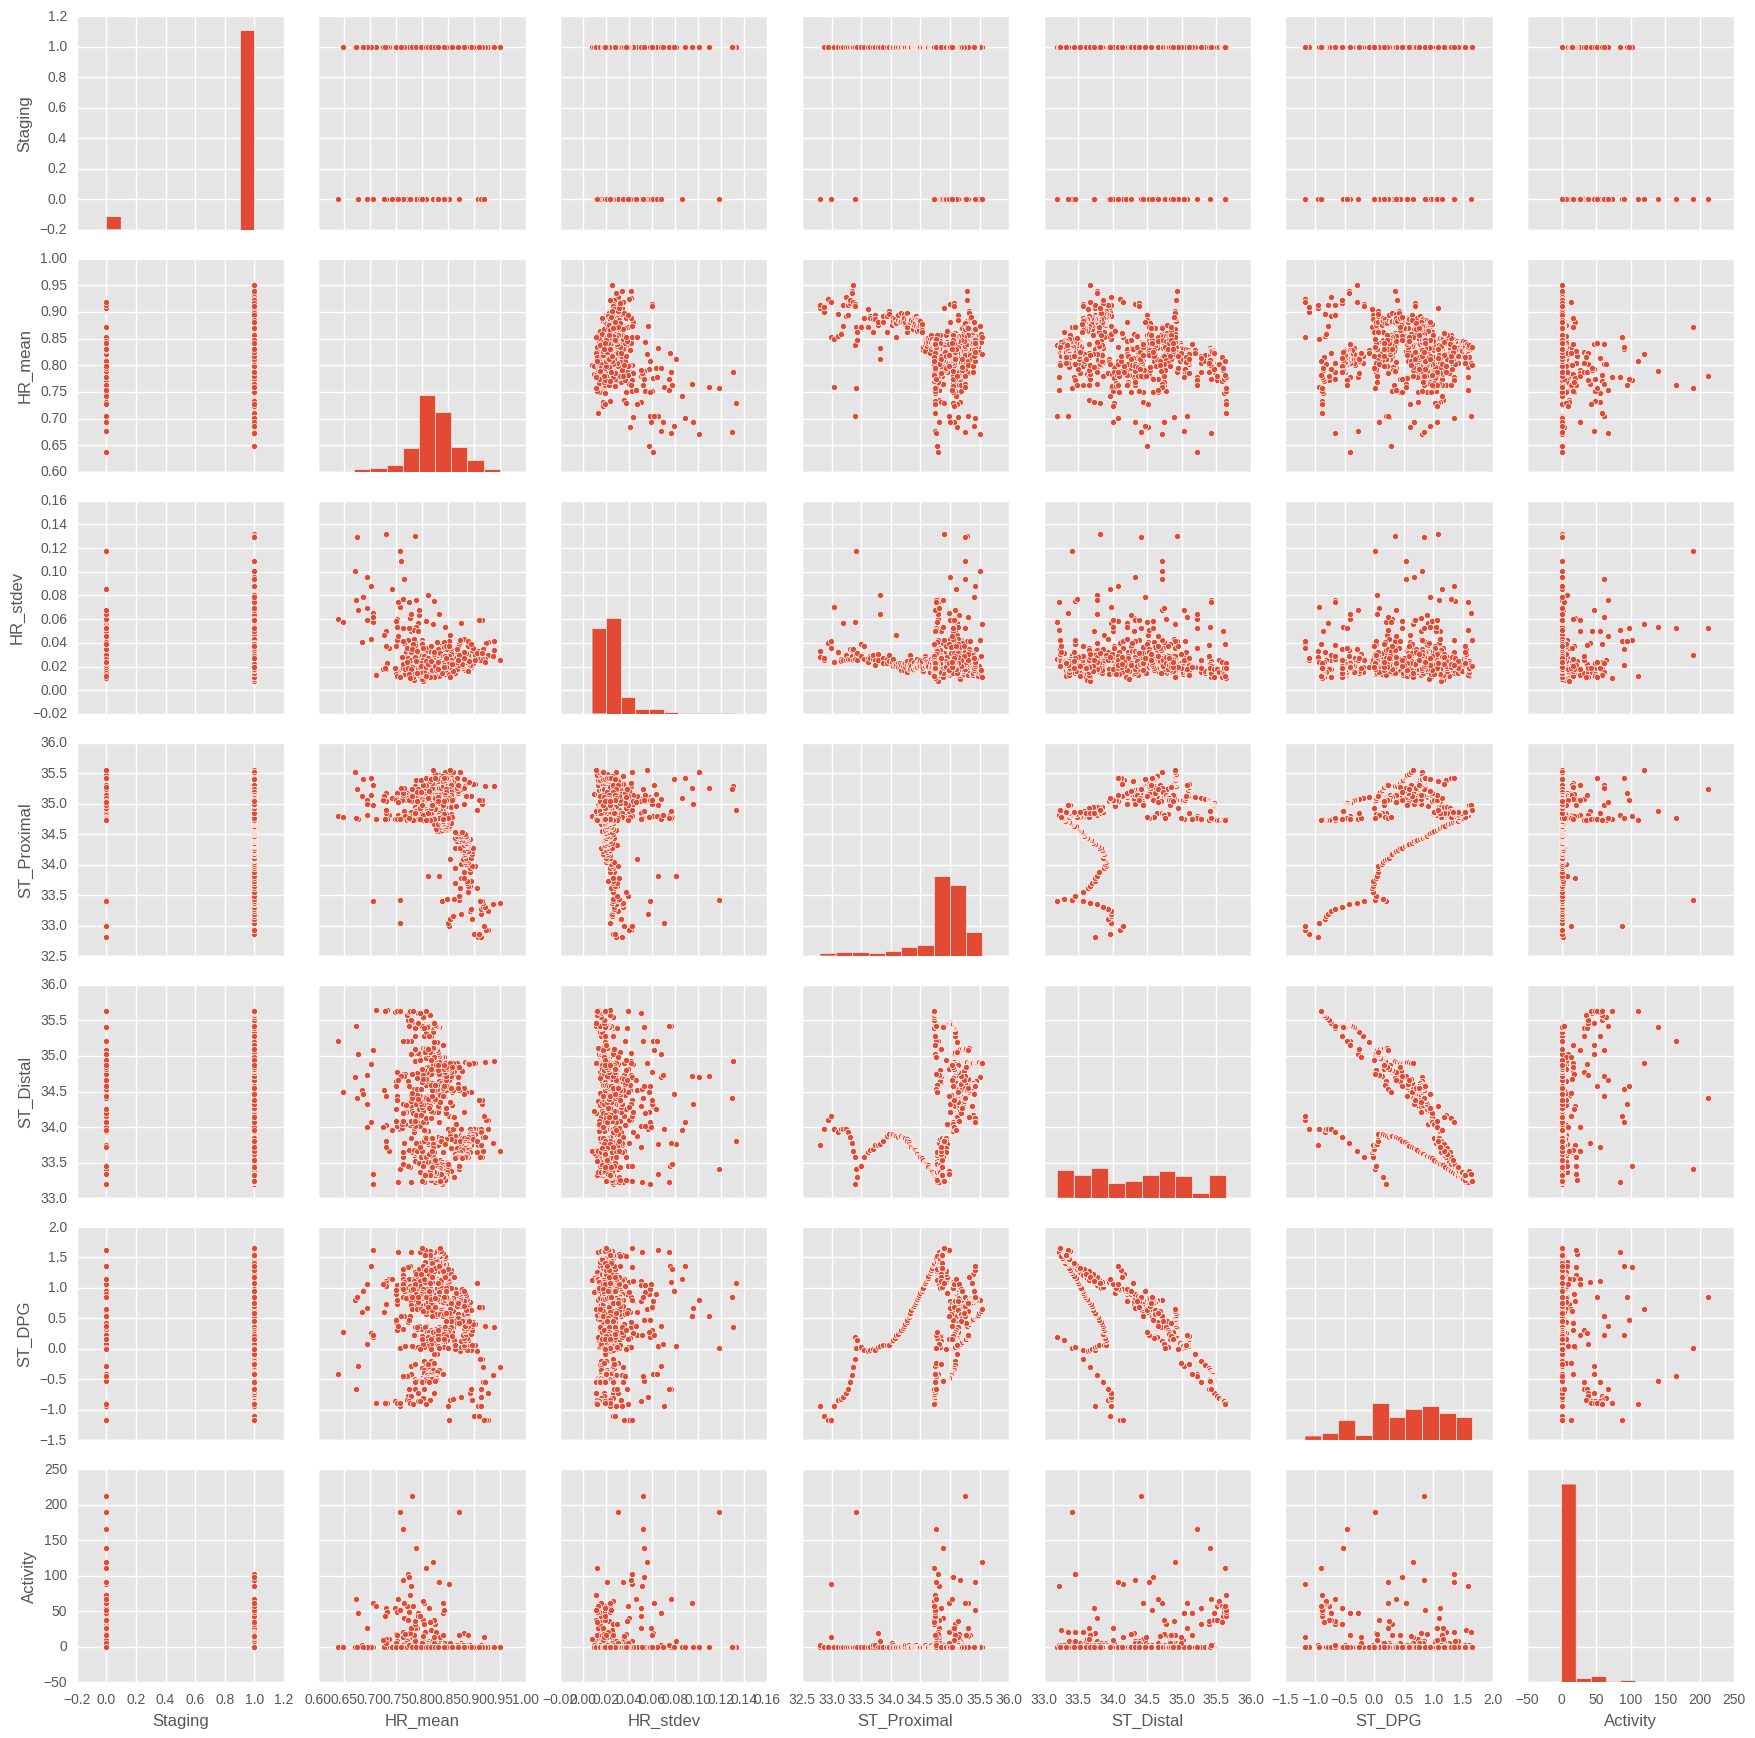

In [79]:
sns.pairplot(one_subject[['Staging', 'HR_mean', 'HR_stdev', 'ST_Proximal', 'ST_Distal', 'ST_DPG', 'Activity']], size=2.5)

### Check missing data for heart rate

In [19]:
hr_missing = subjects_df.groupby('Patient_id')[['Staging', 'HR_mean']].count()
hr_missing['diff'] = hr_missing['Staging'] - hr_missing['HR_mean']
hr_missing

,Staging,HR_mean,diff
Patient_id,,,
INS_WI_004,1287,1198,89
INS_WI_007,844,843,1
INS_WI_008,924,907,17
INS_WI_011,729,452,277
INS_WI_012,1024,985,39
INS_WI_013,919,910,9
INS_WI_017,877,875,2
INS_WI_019,1129,609,520
INS_WI_020,1049,846,203


In [9]:
sub_019 = subjects_df[subjects_df['Patient_id']=='INS_WI_019']
sub_019.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1129 entries, 2015-12-02 21:39:31 to 2015-12-03 07:03:31
Data columns (total 18 columns):
Abdomen        1128 non-null float64
Activity       1129 non-null float64
Calf           1128 non-null float64
Chest          1128 non-null float64
Fingertip      1128 non-null float64
Foot           1128 non-null float64
Forearm        1128 non-null float64
Forehead       1128 non-null float64
HR_mean        609 non-null float64
HR_stdev       604 non-null float64
Hand           1128 non-null float64
Patient_id     1129 non-null object
Scapula        1128 non-null float64
Staging        1129 non-null int64
Toe            1128 non-null float64
Upperarm       1128 non-null float64
Upperleg       1128 non-null float64
White Light    1129 non-null float64
dtypes: float64(16), int64(1), object(1)
memory usage: 167.6+ KB


In [20]:
hr_sub_019 = sub_019[['HR_mean', 'HR_stdev']].ffill()
hr_sub_019['2015-12-2 22:10':'2015-12-2 22:15']

,HR_mean,HR_stdev
2015-12-02 22:10:01,1.290833,0.230290
2015-12-02 22:10:31,1.193625,0.219499
2015-12-02 22:11:01,1.193625,0.219499
2015-12-02 22:11:31,1.617667,0.047290
2015-12-02 22:12:01,1.297000,0.238365
2015-12-02 22:12:31,1.270958,0.279483
2015-12-02 22:13:01,1.348267,0.268809
2015-12-02 22:13:31,1.221286,0.259599
2015-12-02 22:14:01,1.431524,0.215211
2015-12-02 22:14:31,1.403143,0.243870


### Check the mean temperature for each side of each subject

In [73]:
subjects_df.groupby('Patient_id')[['Forehead', 'Fingertip', 'Chest', 'Forearm', 'Upperarm', 'Hand', 'Scapula', 'Abdomen', 
                           'Upperleg', 'Calf', 'Foot', 'Toe']].mean()

,Forehead,Fingertip,Chest,Forearm,Upperarm,Hand,Scapula,Abdomen,Upperleg,Calf,Foot,Toe
Patient_id,,,,,,,,,,,,
INS_WI_008,31.859596,34.544668,34.007606,35.118081,31.641523,34.010129,34.483728,34.579764,33.572361,34.974758,33.999136,32.968797
INS_WI_012,33.289233,34.830983,34.007210,32.503249,32.088640,34.008536,35.466112,34.617343,32.461996,32.727551,33.507309,32.171141
INS_WI_017,34.527070,34.528159,34.038524,31.311299,33.971180,33.083175,35.419663,35.224476,31.864909,32.712033,33.648558,32.464848
INS_WI_019,33.900034,34.456176,33.193374,32.102866,33.652274,33.231009,35.437789,34.890678,32.171943,33.207574,33.213783,32.031668
INS_WI_021,34.233063,35.505076,34.172872,32.908021,33.987319,34.189128,35.670384,35.081798,33.835340,34.422834,34.847120,34.167199
INS_WI_022,35.613417,35.918586,35.510954,34.844254,35.505063,35.029002,35.285263,35.270252,35.299102,34.643695,35.245082,34.962310
INS_WI_025,33.976251,32.670321,33.669402,32.403699,35.994889,32.741467,36.489012,35.826763,34.650505,35.707265,33.929514,33.803442
INS_WI_030,33.328825,33.631874,33.989127,30.988406,33.469708,33.378064,34.705851,33.915259,33.690545,34.168658,34.214467,33.437910
INS_WI_032,34.607193,33.615062,35.385318,30.584816,33.464460,33.574096,33.700900,35.813276,34.932904,35.340166,34.684413,33.626826


In [44]:
print(subjects_df[subjects_df['Patient_id']=='INS_WI_008'].index.min(), subjects_df[subjects_df['Patient_id']=='INS_WI_008'].index.max())
subjects_df[(subjects_df['Patient_id']=='INS_WI_008')&(subjects_df['Staging']==0)]['2015-9-24 0o ']

2015-09-23 22:26:04 2015-09-24 06:05:04


,Abdomen,Activity,Calf,Chest,Fingertip,Foot,Forearm,Forehead,HR_mean,HR_stdev,Hand,Patient_id,Scapula,Staging,Toe,Upperarm,Upperleg,White Light
2015-09-23 22:26:04,33.46775,0.0,34.12375,32.21675,34.15850,31.78700,33.56150,32.64150,1.036172,0.018174,33.39950,INS_WI_008,34.16950,0,27.33125,29.3920,33.47600,1.76
2015-09-23 22:26:34,33.46775,0.0,34.12375,32.21675,34.15850,31.78700,33.56150,32.64150,1.026600,0.019356,33.39950,INS_WI_008,34.16950,0,27.33125,29.3920,33.47600,0.18
2015-09-23 22:27:04,33.57725,0.0,34.17100,32.26400,34.40800,31.91200,33.65500,32.62600,1.028310,0.012995,33.63325,INS_WI_008,34.21600,0,27.58125,29.3920,33.53900,0.18
2015-09-23 22:27:34,33.57725,0.0,34.17100,32.26400,34.40800,31.91200,33.65500,32.62600,1.069958,0.237656,33.63325,INS_WI_008,34.21600,0,27.58125,29.3920,33.53900,0.18
2015-09-23 22:28:04,33.68600,0.0,34.20200,32.26400,34.57950,32.03700,33.73275,32.56300,1.046815,0.029647,33.82025,INS_WI_008,34.27900,0,27.92450,29.3920,33.60100,0.18
2015-09-23 22:28:34,33.68600,0.0,34.20200,32.26400,34.57950,32.03700,33.73275,32.56300,1.056630,0.063356,33.82025,INS_WI_008,34.27900,0,27.92450,29.3920,33.60100,0.18
2015-09-23 22:29:04,33.76425,0.0,34.23300,32.26400,34.73575,32.09900,33.81100,32.56300,1.064250,0.096184,33.92900,INS_WI_008,34.32550,0,28.28350,29.3920,33.64750,0.18
2015-09-23 22:29:34,33.76425,0.0,34.23300,32.26400,34.73575,32.09900,33.81100,32.56300,1.067000,0.024207,33.92900,INS_WI_008,34.32550,0,28.28350,29.3920,33.64750,0.18
2015-09-23 22:30:04,33.82650,57.0,34.29600,32.26400,34.81375,32.14575,33.85775,32.56300,1.111037,0.200078,33.97625,INS_WI_008,34.35675,0,28.53325,29.3920,33.66300,0.14
2015-09-23 22:30:34,33.82650,51.0,34.29600,32.26400,34.81375,32.14575,33.85775,32.56300,1.067455,0.031194,33.97625,INS_WI_008,34.35675,0,28.53325,29.3920,33.66300,0.22


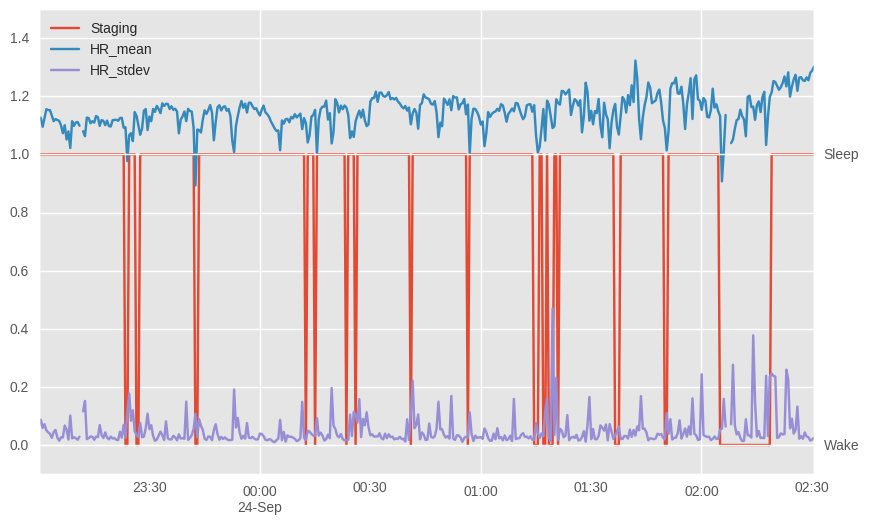

In [52]:
one_subject = subjects_df['2015-9-23 23:00':'2015-9-24 2:30']
ax1 = one_subject.plot(y=['Staging', 'HR_mean', 'HR_stdev'])
plt.ylim(-0.1, 1.5)
ax2 = ax1.twinx()
plt.ylim(-0.1, 1.5)
plt.yticks([0, 1], ['Wake', 'Sleep'])
# plt.margins(0.2)
# plt.subplots_adjust(right=0.95)
plt.show()


#### INS_WI_034: seems the temperature sensors not working properly

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f29db894e48>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7f29db59a470>], dtype=object)

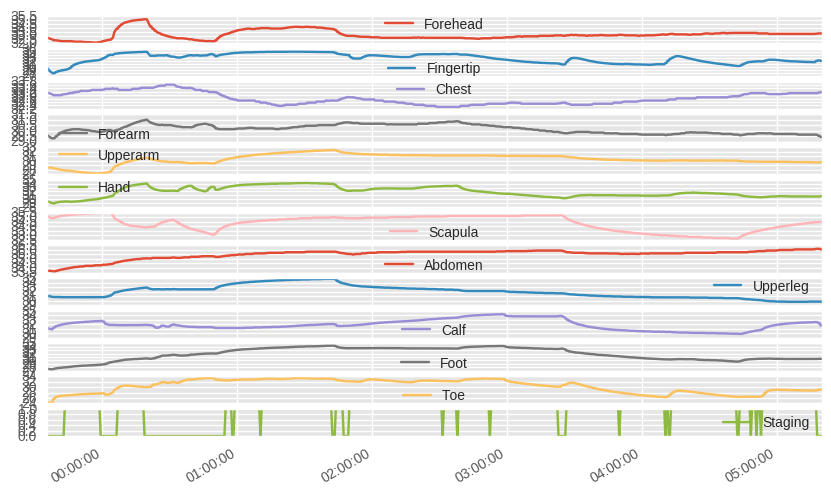

In [43]:
subjects_df[subjects_df['Patient_id']=='INS_WI_034'][['Forehead', 'Fingertip', 'Chest', 'Forearm', 'Upperarm', 'Hand', 'Scapula', 'Abdomen', 
                           'Upperleg', 'Calf', 'Foot', 'Toe', 'Staging']].plot(subplots=True)
#plt.tight_layout();#figure(); ins_wi_034.plot()

# Dateset 2 - Subjects without Actigraphy data 

In [5]:
noact_df = pd.read_csv("./Input/ins_subjects_no_act_161016.csv", index_col=0, parse_dates=True)
noact_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 56174 entries, 2015-09-02 22:49:52 to 2015-10-01 07:01:16
Data columns (total 19 columns):
Abdomen        56142 non-null float64
Calf           54484 non-null float64
Chest          56157 non-null float64
Fingertip      55253 non-null float64
Foot           56132 non-null float64
Forearm        55457 non-null float64
Forehead       55382 non-null float64
HR_mean        53119 non-null float64
HR_stdev       53081 non-null float64
Hand           53307 non-null float64
Patient_id     56174 non-null object
ST_DPG         56148 non-null float64
ST_Distal      56148 non-null float64
ST_Proximal    56157 non-null float64
Scapula        55310 non-null float64
Staging        56174 non-null object
Toe            53836 non-null float64
Upperarm       54214 non-null float64
Upperleg       53331 non-null float64
dtypes: float64(17), object(2)
memory usage: 8.6+ MB


In [6]:
noact_df['ts'] = noact_df.index

In [4]:
noact_df.describe()

,Abdomen,Calf,Chest,Fingertip,Foot,Forearm,Forehead,HR_mean,HR_stdev,Hand,ST_DPG,ST_Distal,ST_Proximal,Scapula,Toe,Upperarm,Upperleg
count,56142.000000,54484.000000,56157.000000,55253.000000,56132.000000,55457.000000,55382.000000,53119.000000,53081.000000,53307.000000,56148.000000,56148.000000,56157.000000,55310.000000,53836.000000,54214.000000,53331.000000
mean,35.531004,34.527713,34.830716,34.908721,34.039219,33.723952,33.867028,1.001231,0.073922,34.184071,0.486949,34.187206,34.673743,34.766043,33.644760,33.851859,34.414314
std,0.858972,1.243332,0.953748,1.458837,2.075821,1.608114,0.844972,0.153680,0.068583,1.248374,1.297758,1.400206,0.874236,1.131304,2.089025,1.522386,1.183829
min,30.516000,29.816000,31.621000,22.102500,22.437000,28.465500,31.040000,0.476000,0.000000,28.237250,-2.097875,25.544167,31.272375,30.516000,22.303000,24.853500,28.946000
25%,35.188000,33.820000,34.244250,34.329000,33.757000,32.617000,33.325000,0.888926,0.030415,33.446000,-0.274062,33.722625,34.138875,33.967000,33.129500,32.915750,33.704000
50%,35.714000,34.747000,34.882000,35.192000,34.588500,33.885000,33.909000,0.998133,0.050586,34.225000,0.229719,34.504125,34.744250,34.934000,34.167000,34.000000,34.614500
75%,36.067000,35.438000,35.524000,35.878000,35.124625,35.016000,34.353000,1.108111,0.093021,35.051000,0.883500,35.058281,35.290000,35.714000,34.854000,35.008000,35.300000
max,38.217000,37.158500,37.002000,37.016500,37.158500,37.184000,36.339000,2.353000,0.909688,37.297000,8.187958,37.122750,36.593750,36.881750,37.158500,36.815000,36.985000


In [5]:
pd.set_option('display.max_rows', 59)
noact_df.groupby('Patient_id')[['HR_mean', 'HR_stdev']].mean()
noact_df.groupby('Patient_id')[['ST_Proximal', 'ST_Distal', 'ST_DPG']].mean()

,ST_Proximal,ST_Distal,ST_DPG
Patient_id,,,
INS_WI_001,35.738321,36.499858,-0.761538
INS_WI_002,34.450908,33.568907,0.882001
INS_WI_003,35.620292,33.186278,2.434014
INS_WI_004,33.509325,33.537763,-0.028439
INS_WI_006,33.290220,33.797263,-0.507043
INS_WI_007,35.342914,35.159185,0.183729
INS_WI_008,33.455086,33.874405,-0.419319
INS_WI_009,35.243599,34.520585,0.723014
INS_WI_011,35.015235,34.537393,0.477842


## Check missing HR data per subject

In [9]:
hr_missing = noact_df.groupby('Patient_id')[['Staging', 'HR_mean']].count()
hr_missing['diff'] = hr_missing['Staging'] - hr_missing['HR_mean']

In [11]:
# hr_missing['diff'] = hr_missing['Staging'] - hr_missing['HR_mean']
pd.set_option('display.max_rows', 59)
hr_missing.columns = ['Num_Staging', 'Num_HR_mean', 'Diff']
hr_missing.sort_values('Diff', ascending=False)
hr_missing

,Num_Staging,Num_HR_mean,Diff
Patient_id,,,
INS_WI_001,889,801,88
INS_WI_002,1033,1017,16
INS_WI_003,987,982,5
INS_WI_004,1287,1198,89
INS_WI_006,1026,1020,6
INS_WI_007,844,843,1
INS_WI_008,924,907,17
INS_WI_009,1074,1057,17
INS_WI_011,729,452,277


In [7]:
noact_df[noact_df['Patient_id']=='INS_WI_019'].describe()

,Abdomen,Calf,Chest,Fingertip,Foot,Forearm,Forehead,HR_mean,HR_stdev,Hand,ST_DPG,ST_Distal,ST_Proximal,Scapula,Toe,Upperarm,Upperleg
count,1128.000000,1128.000000,1128.000000,1128.000000,1128.000000,1128.000000,1128.000000,609.000000,604.000000,1128.000000,1128.000000,1128.000000,1128.000000,1128.000000,1128.000000,1128.000000,1128.000000
mean,34.728065,33.122372,33.128487,34.341585,33.026367,31.962465,33.882226,1.240332,0.195756,33.101258,0.312212,33.099216,33.411427,35.617124,31.927653,33.712600,32.076558
std,0.628477,0.660319,0.467488,0.673923,0.858745,0.484958,0.166324,0.163723,0.090567,0.475033,0.378539,0.649012,0.461951,0.722431,1.026608,0.422856,0.837843
min,33.759000,31.451000,32.094000,32.041500,31.328000,30.984000,33.285000,0.824389,0.012250,31.871000,-0.698437,31.572063,32.316313,32.931000,29.410000,32.311500,28.946000
25%,34.258000,32.667000,32.843000,33.898000,32.498250,31.452000,33.815000,1.130727,0.124413,32.775500,0.046141,32.695188,33.084875,35.801000,31.235750,33.528000,31.678500
50%,34.632000,32.947000,32.967000,34.350250,32.919000,31.951000,33.878000,1.256267,0.203486,33.056000,0.248844,33.061969,33.427750,35.863000,32.016000,33.840000,32.053375
75%,34.866500,33.352500,33.591000,34.756000,33.531438,32.326000,33.940000,1.342273,0.267404,33.368063,0.498188,33.517063,33.697906,35.926000,32.639500,34.027000,32.416375
max,36.301250,35.565000,33.887500,35.816000,35.305250,32.871500,34.377000,1.973000,0.483857,34.055000,1.446125,34.598125,34.984063,36.175000,34.230000,34.339000,35.658500
